In [1]:
import pandas as pd, numpy as np, statsmodels.api as sm, matplotlib.pyplot as plt, seaborn as sns
from datetime import datetime, timedelta
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Arial'
plt.rcParams['mathtext.it'] = 'Arial:italic'

# parameters

In [2]:
yeari, yearf = '2024', '2024'
weeki, weekf = '18', '31'

In [3]:
di = datetime.strptime(f'{yeari}-{weeki}-1', "%Y-%W-%w").date()
df = datetime.strptime(f'{yearf}-{weekf}-1', "%Y-%W-%w").date() + timedelta(6)
ds = [di+timedelta(dt) for dt in range((df-di).days+1)]
daylist = ds
print(di, 'until', df)

2024-04-29 until 2024-08-04


In [4]:
cdef = 'tl7_10m'# 'tl5_10m' 'tl6_10m' 'tl7_10m' 'tl8_10m' 'tl8_60m'
cdef_alt = '16m_10min'# tl5: 62 ... tl7: 16   tl8: 8

# metadata

In [22]:
# n_c cities: load total contact numbers numbers for cities
data = pd.read_csv(f'data/fig2/ncontacts_cities_{cdef}.csv')# _2
data['day'] = [d.date() for d in pd.to_datetime(data.day)]

# n_pop cities & stadiums: load stadium capacity data for EURO 2024
stadium_data = pd.read_csv('data/metadata/stadium_data.csv')

# n_d cities: load did numbers for cities
panel_data = pd.read_csv('data/metadata/panel_data.csv')
panel_data = panel_data.merge(stadium_data[['city','population']])
panel_data['pdid'] = panel_data.ndids / panel_data.population

# n_p cities: load ping numbers per did for cities
data_pingfreq = pd.read_csv('data/metadata/data_pingfreq.csv')
data_pingfreq = data_pingfreq.rename(columns={'ndids':'ndids_wo_inactive'})
data_pingfreq = panel_data[['city','ndids']].drop_duplicates().merge(data_pingfreq[['city','ndids_wo_inactive','npings']], on='city')
# wo_inactive removes dids on days they are inactive (no pings), therefore higher ping rate that when they are included
#data_pingfreq['npingsperdid_wo_inactive'] = data_pingfreq.npings / data_pingfreq.ndids_wo_inactive
data_pingfreq['npingsperdid'] = data_pingfreq.npings / data_pingfreq.ndids / ((df-di).days + 1)
#data_pingfreq['fpingsperdid_wo_inactive'] = data_pingfreq.npingsperdid_wo_inactive / (1440. / 10.)
data_pingfreq['fpingsperdid'] = data_pingfreq.npingsperdid / (1440. / 10.)

# n_d stadiums: load did numbers for stadiums
panelstad_data2 = pd.read_csv('data/metadata/panelstad_data2.csv')
panelstad_data2['day'] = [d.date() for d in pd.to_datetime(panelstad_data2.day)]

# load mass event data
match_data = pd.read_csv('data/metadata/event_data.csv')
match_data['day'] = [d.date() for d in pd.to_datetime(match_data.day)]

In [23]:
panel_data

,city,ndids,population,pdid
0,Berlin,7355,3645000,0.002018
1,Berlin,7355,3645000,0.002018
2,Dortmund,2265,587000,0.003859
3,Düsseldorf,1418,619000,0.002291
4,Frankfurt am Main,1080,753000,0.001434
5,Frankfurt am Main,1080,753000,0.001434
6,Gelsenkirchen,1489,261000,0.005705
7,Hamburg,3466,1841000,0.001883
8,Hamburg,3466,1841000,0.001883
9,Köln,1908,1086000,0.001757


In [24]:
data_pingfreq

,city,ndids,ndids_wo_inactive,npings,npingsperdid,fpingsperdid
0,Berlin,7355,353402,18239313,25.304614,0.175726
1,Dortmund,2265,110290,4895086,22.052917,0.153145
2,Düsseldorf,1418,73831,3720448,26.772747,0.185922
3,Frankfurt am Main,1080,52833,2606480,24.626606,0.171018
4,Gelsenkirchen,1489,71387,3455363,23.679521,0.164441
5,Hamburg,3466,168859,8363145,24.621527,0.170983
6,Köln,1908,90051,4227072,22.606597,0.156990
7,Leipzig,3128,158486,7637571,24.915089,0.173021
8,München,1399,66807,2921822,21.311301,0.147995
9,Stuttgart,1241,61204,2832907,23.293485,0.161760


# figures & tables

## for cities

In [12]:
#conpop_cmp = data.drop(columns=['area_id']).groupby(['day','city']).sum().reset_index()\
#                .merge(panel_data[['city','pdid','ndids','population']], on='city')\
#                .merge(data_pingfreq[['city','fpingsperdid_wo_inactive']], on='city')\
#                .drop_duplicates().rename(columns={'fpingsperdid_wo_inactive':'fpingsperdid'})
conpop_cmp = data.drop(columns=['resolution','event','contacts_nonunique','contacts_nonunique_stadium'])\
                .rename(columns={'contacts_unique':'ncontacts_1','contacts_unique_stadium':'ncontacts_2'})\
                .merge(panel_data[['city','pdid','ndids','population']], on='city')\
                .merge(data_pingfreq[['city','fpingsperdid']], on='city')\
                .drop_duplicates()#.rename(columns={'fpingsperdid_wo_inactive':'fpingsperdid'})
# fpingsperdid_wo_inactive

conpop_cmp

,city,day,ncontacts_1,ncontacts_2,pdid,ndids,population,fpingsperdid
0,Berlin,2024-04-29,2624,0,0.002018,7355,3645000,0.175726
2,Berlin,2024-04-30,3042,0,0.002018,7355,3645000,0.175726
4,Berlin,2024-05-01,1370,0,0.002018,7355,3645000,0.175726
6,Berlin,2024-05-02,2604,0,0.002018,7355,3645000,0.175726
8,Berlin,2024-05-03,2920,0,0.002018,7355,3645000,0.175726
...,...,...,...,...,...,...,...,...
1375,Stuttgart,2024-07-31,370,0,0.001954,1241,635000,0.161760
1376,Stuttgart,2024-08-01,296,0,0.001954,1241,635000,0.161760
1377,Stuttgart,2024-08-02,284,0,0.001954,1241,635000,0.161760
1378,Stuttgart,2024-08-03,880,0,0.001954,1241,635000,0.161760


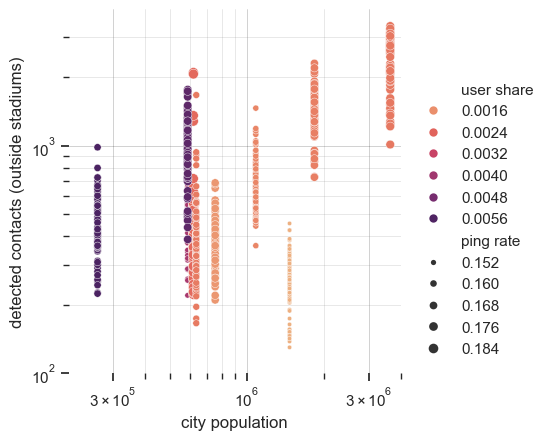

In [13]:
sns.set_theme(style="ticks")

cmap = sns.color_palette('flare', as_cmap=True)#sns.cubehelix_palette(rot=-.2, as_cmap=True)

g = sns.relplot(
    data=conpop_cmp,
    x="population", y="ncontacts_1",
    #x="population", y="ncontacts_1_normed",
    #x="population", y="ncontacts_1_model",
    hue="pdid", size="fpingsperdid",#"ncontacts_2",
    palette=cmap, sizes=(10, 50),#200),
    height=4.5, aspect=1.,
)
g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)
g.ax.set_xlabel('city population')
g.ax.set_ylabel('detected contacts (outside stadiums)')
g.ax.grid(which='major', linestyle='-', linewidth='0.5', color='black', alpha=.25)
g.ax.grid(which='minor', linestyle='-', linewidth='0.5', color='grey', alpha=.25)
g.ax.set_xlim([2.01e5,4e6])
g.ax.set_ylim([1e2,3.99e3])# for tl7
#g.ax.set_ylim([4e2,1.99e4])# for tl5
#g.ax.set_ylim([4e1,1.99e3])# for tl8 10min
#g.ax.set_ylim([2e2,9.99e3])# for tl8 60min
g.ax.set_xticks([3e5,1e6,3e6])
g.ax.set_xticklabels([r'$3\times 10^5$', r'$10^6$', r'$3\times 10^6$'], fontname="Arial")

lg = g._legend
for tx in lg.texts:
    if tx.get_text() == 'pdid':
        tx.set_text('user share')
    if tx.get_text() == 'ncontacts_2':
        tx.set_text('in stadiums')
    if tx.get_text() == 'fpingsperdid':
        tx.set_text('ping rate')

plt.savefig(f'plots/figs2/citybias_npop.jpg', bbox_inches='tight', dpi=300)
plt.savefig(f'plots/figs2/citybias_npop.pdf', bbox_inches='tight')
plt.show()

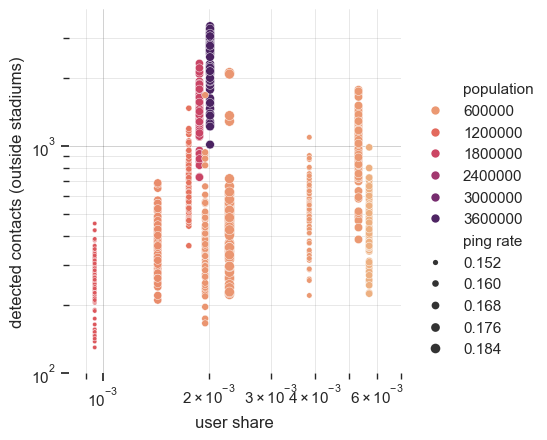

In [14]:
cmap = sns.color_palette('flare', as_cmap=True)#sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=conpop_cmp,
    x="pdid", y="ncontacts_1",#_normed",
    hue="population", size="fpingsperdid",#"ncontacts_2",
    palette=cmap, sizes=(10, 50),#200),
    height=4.5, aspect=1.,
)
g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)
g.ax.set_xlabel('user share')
g.ax.set_ylabel('detected contacts (outside stadiums)')
g.ax.grid(which='major', linestyle='-', linewidth='0.5', color='black', alpha=.25)
g.ax.grid(which='minor', linestyle='-', linewidth='0.5', color='grey', alpha=.25)
g.ax.set_xlim([8.01e-4,7e-3])
g.ax.set_ylim([1e2,3.99e3])# for tl7
#g.ax.set_ylim([4e2,1.99e4])# for tl5
#g.ax.set_ylim([4e1,1.99e3])# for tl8 10min
#g.ax.set_ylim([2e2,9.99e3])# for tl8 60min

lg = g._legend
for tx in lg.texts:
    if tx.get_text() == 'ncontacts_2':
        tx.set_text('in stadiums')
    if tx.get_text() == 'fpingsperdid':
        tx.set_text('ping rate')

plt.savefig(f'plots/figs2/citybias_pdid.jpg', bbox_inches='tight', dpi=300)
plt.savefig(f'plots/figs2/citybias_pdid.pdf', bbox_inches='tight')
plt.show()

In [15]:
# Define the response variable y and the predictor variables X
y = conpop_cmp['ncontacts_1']
#y = conpop_cmp['ncontacts_2']

#X = conpop_cmp[['pdid', 'population']]
#X = conpop_cmp[['population']]
#X = conpop_cmp[['ndids','pdid']]
X = conpop_cmp[['population','pdid','fpingsperdid']]
X = conpop_cmp[['ndids','fpingsperdid']]
#X = conpop_cmp[['ndids_stad']]
#X['pdid'] = X.pdid / pdid_avg

y, X = np.log10(y), np.log10(X)
 
# Add a constant term to the predictors (for the intercept)
X = sm.add_constant(X)
 
# Fit the model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            ncontacts_1   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     1627.
Date:                Sat, 21 Feb 2026   Prob (F-statistic):          1.09e-311
Time:                        12:17:55   Log-Likelihood:                 481.14
No. Observations:                 980   AIC:                            -956.3
Df Residuals:                     977   BIC:                            -941.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.1892      0.166      7.152   

In [16]:
predictions = model.predict(X)
conpop_cmp['ncontacts_1_model'] = 10.**predictions

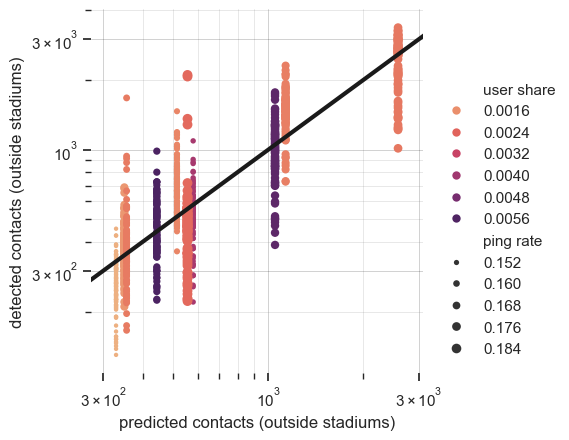

In [17]:
cmap = sns.color_palette('flare', as_cmap=True)#sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=conpop_cmp,
    x="ncontacts_1_model", y="ncontacts_1",
    hue="pdid", size="fpingsperdid",
    palette=cmap, sizes=(10, 50),#200),
    lw=0,# size=10,
    height=4.5, aspect=1.,
)
#g.ax.plot(conpop_cmp.ndids, 10.**(conpop_cmp.ncontacts_1_model), c='k', lw=3)
g.ax.plot([1e0,1e5], [1e0,1e5], c='k', lw=3)
g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)
g.ax.set_xlabel('predicted contacts (outside stadiums)')#'users in city')
g.ax.set_ylabel('detected contacts (outside stadiums)')
g.ax.grid(which='major', linestyle='-', linewidth='0.5', color='black', alpha=.25)
g.ax.grid(which='minor', linestyle='-', linewidth='0.5', color='grey', alpha=.25)
#g.ax.set_xlim([1e3,7.99e3])
xu, xo = conpop_cmp.ncontacts_1_model.min() / 1.2, conpop_cmp.ncontacts_1_model.max() * 1.2
yu, yo = conpop_cmp.ncontacts_1.min() / 1.2, conpop_cmp.ncontacts_1.max() * 1.2
#g.ax.set_xlim([1./1.2*conpop_cmp[conpop_cmp.ncontacts_1>0.].ndids.min(),1.2*conpop_cmp.ndids.max()])
#g.ax.set_ylim([2.01e2,7.99e3])
g.ax.set_xlim([xu, xo])
g.ax.set_ylim([yu, yo])
g.ax.set_xticks([3e2,1e3,3e3])
g.ax.set_xticklabels([r'$3\times 10^2$', r'$10^3$', r'$3\times 10^3$'], fontname="Arial")
g.ax.set_yticks([3e2,1e3,3e3])
g.ax.set_yticklabels([r'$3\times 10^2$', r'$10^3$', r'$3\times 10^3$'], fontname="Arial")

##lg = g._legend
#lg.remove()
##for tx in lg.texts:
##    #if tx.get_text() == 'pdid':
##    #    tx.set_text('user share')
##    if tx.get_text() == '10':
##        tx.set_text('')
##lg.set_title('user share')

# Retrieve the legend handles and labels
##handles, labels = lg.legend_handles, lg.texts
#print([l.get_text() for l in labels])
# Define the label you want to remove
##label_to_remove = ''
# Filter out the handle and label to remove
##filtered_handles_labels = [(h, l) for h, l in zip(handles, labels) if l.get_text() != label_to_remove]
#print(filtered_handles_labels)
# Unpack the filtered handles and labels
##filtered_handles, filtered_labels = zip(*filtered_handles_labels)
# Update the legend with the filtered handles and labels
#g.ax.legend(filtered_handles, [label.get_text() for label in filtered_labels])

lg = g._legend
for tx in lg.texts:
    if tx.get_text() == 'pdid':
        tx.set_text('user share')
    if tx.get_text() == 'ndids':
        tx.set_text('users')
    if tx.get_text() == 'ncontacts_2':
        tx.set_text('in stadiums')
    if tx.get_text() == 'fpingsperdid':
        tx.set_text('ping rate')

plt.savefig(f'plots/figs2/scaling_cities.jpg', bbox_inches='tight', dpi=300)
plt.savefig(f'plots/figs2/scaling_cities.pdf', bbox_inches='tight')
plt.show()

In [18]:
expo_city_p, expo_city_q = model.params.ndids, model.params.fpingsperdid# for tl7
#expo_city = 1.0566# for tl5
#expo_city = 1.0694# for tl8 10min
#expo_city = 1.1038# for tl8 60min
print(f'alpha_p: {expo_city_p}, alpha_q: {expo_city_q}')

alpha_p: 1.0092935878155718, alpha_q: 2.225230891459897


alpha_p: 1.0092935878155718, alpha_q: 2.225230891459897

## for stadiums

In [25]:
#conpop_cmp = data\
#                .merge(panel_data[['city','pdid','ndids','population']], on='city')\
#                .merge(panelstad_data2, on=['day','area_id'], how='left', suffixes=('','_stad'))\
#                .merge(stadium_data[['area_id','capacity']], on='area_id')\
#                .merge(data_pingfreq[['city','fpingsperdid_wo_inactive']], on='city')\
#                .drop_duplicates().rename(columns={'fpingsperdid_wo_inactive':'fpingsperdid'})

conpop_cmp = data.drop(columns=['resolution','event','contacts_nonunique','contacts_nonunique_stadium'])\
                .rename(columns={'contacts_unique':'ncontacts_1','contacts_unique_stadium':'ncontacts_2'})\
                .merge(panel_data[['city','pdid','ndids','population']], on='city')\
                .merge(stadium_data[stadium_data.area_id.isin([1,2,3,4,10,11,15,24,25,28,16,29,41])][['city','area_id','capacity']], on='city')\
                .merge(panelstad_data2, on=['day','area_id'], how='left', suffixes=('','_stad'))\
                .merge(data_pingfreq[['city','fpingsperdid']], on='city')\
                .drop_duplicates()#.rename(columns={'fpingsperdid_wo_inactive':'fpingsperdid'})
# [stadium_data.area_id.isin([1,2,3,4,10,11,15,24,25,28])]  16,29,41,64
# fpingsperdid_wo_inactive
conpop_cmp = conpop_cmp[conpop_cmp.ndids_stad >= 10]

conpop_cmp = conpop_cmp[conpop_cmp.ncontacts_2 > 0.]
conpop_cmp['pdid_stad'] = conpop_cmp.ndids_stad / conpop_cmp.capacity
#conpop_cmp['ncontacts_2_normed'] = conpop_cmp.ncontacts_2 / conpop_cmp.ndids_stad**1.4701# / conpop_cmp.pdid_stad
#match_rank.pdid_stad[match_rank.ncontacts_2>=10].mean()
conpop_cmp = conpop_cmp.merge(match_data[['day','city','is_football']])

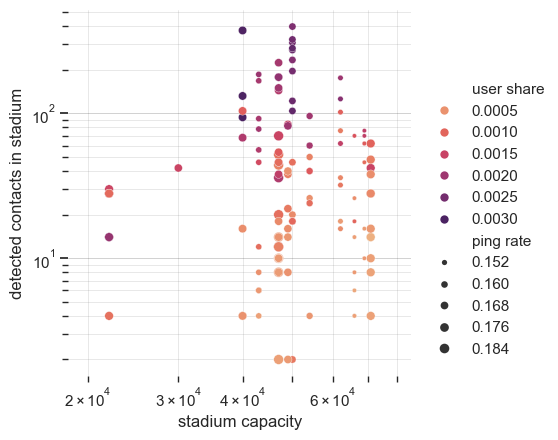

In [22]:
cmap = sns.color_palette('flare', as_cmap=True)#sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=conpop_cmp,
    x="capacity", y="ncontacts_2",# x="ndids_stad",
    hue="pdid_stad", size="fpingsperdid",#"capacity",#"ncontacts_2_normed",
    palette=cmap, sizes=(10, 50),#200),
    height=4.5, aspect=1.,
)
g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)
g.ax.set_xlabel('stadium capacity')#'users in stadium')
g.ax.set_ylabel('detected contacts in stadium')
g.ax.grid(which='major', linestyle='-', linewidth='0.5', color='black', alpha=.25)
g.ax.grid(which='minor', linestyle='-', linewidth='0.5', color='grey', alpha=.25)
#g.ax.set_xlim([1./1.2*conpop_cmp[conpop_cmp.ncontacts_2>0.].ndids_stad.min(),1.2*conpop_cmp.ndids_stad.max()])# x=ndids_stad
g.ax.set_xlim([1./1.2*conpop_cmp[conpop_cmp.ncontacts_2>0.].capacity.min(),1.2*conpop_cmp.capacity.max()])# x=capacity
#g.ax.set_ylim([1e0,7e2])

##lg = g._legend
#for tx in lg.texts:
#    if tx.get_text() == 'pdid_stad':
#        tx.set_text('user share')
##lg.set_title('user share')

lg = g._legend
for tx in lg.texts:
    if tx.get_text() == 'pdid_stad':
        tx.set_text('user share')
    if tx.get_text() == 'ncontacts_2':
        tx.set_text('in stadiums')
    if tx.get_text() == 'fpingsperdid':
        tx.set_text('ping rate')

plt.savefig(f'plots/figs2/stadbias_npop.jpg', bbox_inches='tight', dpi=300)
plt.savefig(f'plots/figs2/stadbias_npop.pdf', bbox_inches='tight')
plt.show()

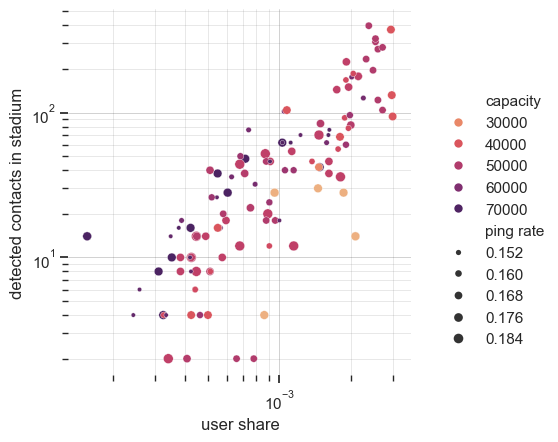

In [23]:
cmap = sns.color_palette('flare', as_cmap=True)#sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=conpop_cmp,
    x="pdid_stad", y="ncontacts_2",# x="ndids_stad",
    hue="capacity", size="fpingsperdid",#"capacity",#"ncontacts_2_normed",
    palette=cmap, sizes=(10, 50),#200),
    height=4.5, aspect=1.,
)
g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)
g.ax.set_xlabel('user share')#'users in stadium')
g.ax.set_ylabel('detected contacts in stadium')
g.ax.grid(which='major', linestyle='-', linewidth='0.5', color='black', alpha=.25)
g.ax.grid(which='minor', linestyle='-', linewidth='0.5', color='grey', alpha=.25)
g.ax.set_xlim([1./1.2*conpop_cmp[conpop_cmp.ncontacts_2>0.].pdid_stad.min(),1.2*conpop_cmp.pdid_stad.max()])# x=ndids_stad
#g.ax.set_xlim([1./1.2*conpop_cmp[conpop_cmp.ncontacts_2>0.].capacity.min(),1.2*conpop_cmp.capacity.max()])# x=capacity
#g.ax.set_ylim([1e0,7e2])

##lg = g._legend
#for tx in lg.texts:
#    if tx.get_text() == 'pdid_stad':
#        tx.set_text('user share')
##lg.set_title('user share')

lg = g._legend
for tx in lg.texts:
    if tx.get_text() == 'pdid_stad':
        tx.set_text('user share')
    if tx.get_text() == 'ncontacts_2':
        tx.set_text('in stadiums')
    if tx.get_text() == 'fpingsperdid':
        tx.set_text('ping rate')

plt.savefig(f'plots/figs2/stadbias_pdid.jpg', bbox_inches='tight', dpi=300)
plt.savefig(f'plots/figs2/stadbias_pdid.pdf', bbox_inches='tight')
plt.show()

In [24]:
# Define the response variable y and the predictor variables X
ncthr = 6
y = conpop_cmp[(conpop_cmp.ncontacts_2 >= ncthr) & (conpop_cmp.ndids_stad > 0)]['ncontacts_2']
X = conpop_cmp[(conpop_cmp.ncontacts_2 >= ncthr) & (conpop_cmp.ndids_stad > 0)][['ndids_stad','fpingsperdid']]#[['pdid', 'capacity']][['ndids_stad']]
#X['pdid'] = X.pdid / pdid_avg
y, X = np.log10(y), np.log10(X)
 
# Add a constant term to the predictors (for the intercept)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()
 
# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            ncontacts_2   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     161.2
Date:                Wed, 18 Feb 2026   Prob (F-statistic):           5.23e-33
Time:                        12:27:45   Log-Likelihood:                 3.8592
No. Observations:                 110   AIC:                            -1.718
Df Residuals:                     107   BIC:                             6.383
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0117      0.612     -0.019   

In [25]:
# Predict values using the model
predictions = model.predict(X)
conpop_cmp['ncontacts_2_model'] = 10.**predictions

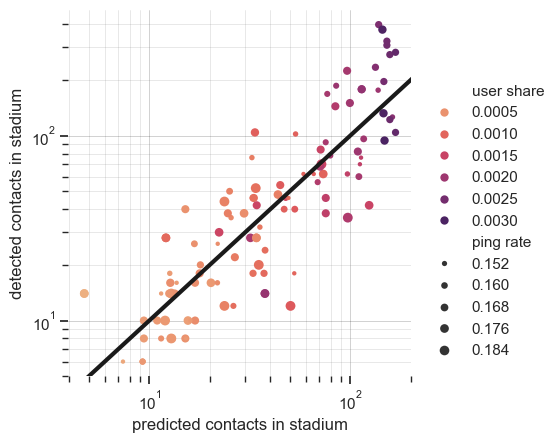

In [26]:
cmap = sns.color_palette('flare', as_cmap=True)#sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=conpop_cmp,
    x="ncontacts_2_model", y="ncontacts_2",
    hue="pdid_stad", size="fpingsperdid",
    palette=cmap, sizes=(10, 50),#200),
    lw=0,# size=10,
    height=4.5, aspect=1.,
)
#g.ax.plot(10.**(X.ndids_stad), 10.**(predictions), c='k', lw=3)
g.ax.plot([1e0,1e5], [1e0,1e5], c='k', lw=3)
g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)
g.ax.set_xlabel('predicted contacts in stadium')#'users in stadium')
g.ax.set_ylabel('detected contacts in stadium')
#g.ax.set_xlim([2.01e0,1.2e2])
g.ax.grid(which='major', linestyle='-', linewidth='0.5', color='black', alpha=.25)
g.ax.grid(which='minor', linestyle='-', linewidth='0.5', color='grey', alpha=.25)
#g.ax.set_xlim([1./1.2*conpop_cmp[conpop_cmp.ncontacts_2>0.].ndids_stad.min(),1.2*conpop_cmp.ndids_stad.max()])
#g.ax.set_ylim([1e0,7e2])
xu, xo = conpop_cmp.ncontacts_2_model.min() / 1.2, conpop_cmp.ncontacts_2_model.max() * 1.2
yu, yo = max(ncthr,conpop_cmp.ncontacts_2.min()) / 1.2, conpop_cmp.ncontacts_2.max() * 1.2
g.ax.set_xlim([xu, xo])
g.ax.set_ylim([yu, yo])
#g.ax.set_xticks([3e2,1e3,3e3])
#g.ax.set_xticklabels([r'$3\times 10^2$', r'$10^3$', r'$3\times 10^3$'], fontname="Arial")
#g.ax.set_yticks([3e2,1e3,3e3])
#g.ax.set_yticklabels([r'$3\times 10^2$', r'$10^3$', r'$3\times 10^3$'], fontname="Arial")

##lg = g._legend
#lg.remove()
##for tx in lg.texts:
#    if tx.get_text() == 'pdid_stad':
#        tx.set_text('user share')
##    if tx.get_text() == '10':
##        tx.set_text('')
##lg.set_title('user share')

# Retrieve the legend handles and labels
##handles, labels = lg.legend_handles, lg.texts
#print([l.get_text() for l in labels])
# Define the label you want to remove
##label_to_remove = ''
# Filter out the handle and label to remove
##filtered_handles_labels = [(h, l) for h, l in zip(handles, labels) if l.get_text() != label_to_remove]
#print(filtered_handles_labels)
# Unpack the filtered handles and labels
##filtered_handles, filtered_labels = zip(*filtered_handles_labels)
# Update the legend with the filtered handles and labels
#g.ax.legend(filtered_handles, [label.get_text() for label in filtered_labels])

lg = g._legend
for tx in lg.texts:
    if tx.get_text() == 'pdid_stad':
        tx.set_text('user share')
    if tx.get_text() == 'ndids_stad':
        tx.set_text('users')
    if tx.get_text() == 'ncontacts_2':
        tx.set_text('in stadiums')
    if tx.get_text() == 'fpingsperdid':
        tx.set_text('ping rate')

plt.savefig(f'plots/figs2/scaling_stadiums.jpg', bbox_inches='tight', dpi=300)
plt.savefig(f'plots/figs2/scaling_stadiums.pdf', bbox_inches='tight')
plt.show()

In [27]:
expo_stad_p, expo_stad_q = model.params.ndids_stad, model.params.fpingsperdid# for tl7
#expo_stad = 1.7619# for tl5
#expo_stad = 1.1716# for tl8 10min
#expo_stad = 1.5373# for tl8 60min
print(f'alpha_p: {expo_stad_p}, alpha_q: {expo_stad_q}')

alpha_p: 1.4468809241992941, alpha_q: 1.0843576472473306


alpha_p: 1.4468809241992941, alpha_q: 1.0843576472473306